In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.model_selection import learning_curve
import pickle
import os
import joblib

In [6]:
df = pd.read_csv('Medicaldataset.csv')

In [7]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [8]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [9]:
df.shape

(1319, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [11]:
le = LabelEncoder()

In [12]:
df['Result'].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

In [14]:
df['Result'] = le.fit_transform(df['Result'])

In [16]:
df['Result'].value_counts()

Result
1    810
0    509
Name: count, dtype: int64

In [17]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


<Axes: >

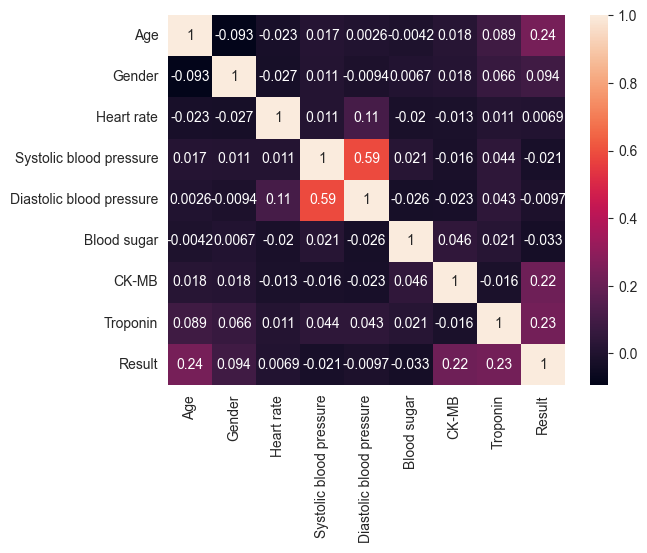

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [20]:
sc = StandardScaler()

In [21]:
X = df.drop('Result', axis=1)
y = df['Result']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1055, 8) (264, 8) (1055,) (264,)


In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
LR_model = LogisticRegression(class_weight='balanced',max_iter=1000)

In [47]:
LR_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
y_pred = LR_model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76       101
           1       0.90      0.74      0.81       163

    accuracy                           0.79       264
   macro avg       0.79      0.80      0.78       264
weighted avg       0.81      0.79      0.79       264



ROC AUC Score: 0.8857741602381097


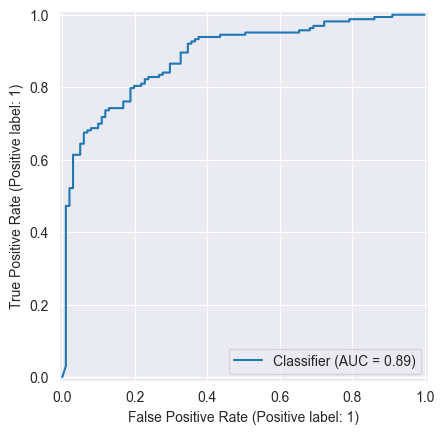

In [50]:
y_proba = LR_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_proba)
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

In [51]:
y_train_pred = LR_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.7971563981042654
Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.78       408
           1       0.96      0.70      0.81       647

    accuracy                           0.80      1055
   macro avg       0.81      0.83      0.80      1055
weighted avg       0.84      0.80      0.80      1055



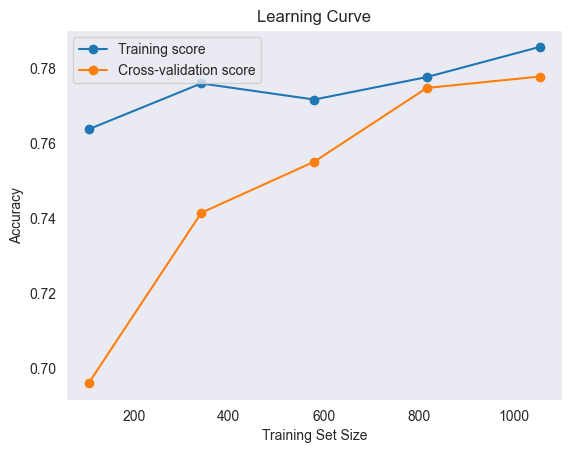

In [52]:
train_sizes, train_scores, test_scores = learning_curve(
    LR_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [54]:
y_train_pred = LR_model.predict(X_train)
print("🔹 Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("🔹 Training Report:")
print(classification_report(y_train, y_train_pred))

🔹 Training Accuracy: 0.7971563981042654
🔹 Training Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.78       408
           1       0.96      0.70      0.81       647

    accuracy                           0.80      1055
   macro avg       0.81      0.83      0.80      1055
weighted avg       0.84      0.80      0.80      1055



In [56]:
y_test_pred = LR_model.predict(X_test)
print("🔸 Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("🔸 Test Report:")
print(classification_report(y_test, y_test_pred))

🔸 Test Accuracy: 0.7878787878787878
🔸 Test Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       101
           1       0.90      0.74      0.81       163

    accuracy                           0.79       264
   macro avg       0.79      0.80      0.78       264
weighted avg       0.81      0.79      0.79       264



In [57]:
dc_model = DecisionTreeClassifier(class_weight='balanced')

In [58]:
dc_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [59]:
y_train_pred = dc_model.predict(X_train)
print("🔹 Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("🔹 Training Report:")
print(classification_report(y_train, y_train_pred))

🔹 Training Accuracy: 1.0
🔹 Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055



In [60]:
y_test_pred = dc_model.predict(X_test)
print("🔸 Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("🔸 Test Report:")
print(classification_report(y_test, y_test_pred))

🔸 Test Accuracy: 0.9734848484848485
🔸 Test Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264



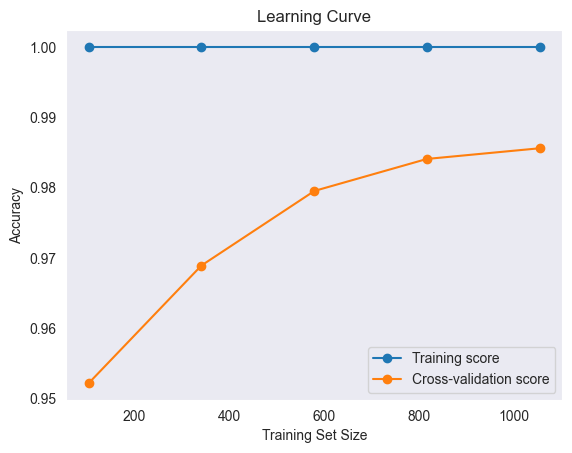

In [65]:
train_sizes, train_scores, test_scores = learning_curve(
    dc_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [67]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [None, 10, 20, 30],        # Depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']        # Number of features to consider at each split
}

In [70]:
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    scoring='accuracy',            # Or use 'f1', 'roc_auc', etc., depending on your task
    n_jobs=-1,                     # Use all available cores
    verbose=2
)

In [71]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [72]:
print("Best Parameters:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [75]:
y_train_pred = best_rf_model.predict(X_train)
print("🔹 Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("🔹 Training Report:")
print(classification_report(y_train, y_train_pred))

🔹 Training Accuracy: 0.9962085308056872
🔹 Training Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       408
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055



In [76]:
y_test_pred = best_rf_model.predict(X_test)
print("🔸 Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("🔸 Test Report:")
print(classification_report(y_test, y_test_pred))

🔸 Test Accuracy: 0.9810606060606061
🔸 Test Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



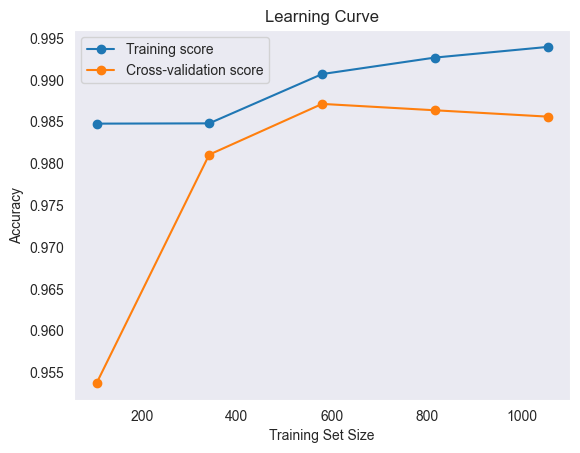

In [77]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [78]:
with open("model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

In [79]:
with open("standard_scaler.pkl", "wb") as f:
    pickle.dump(sc, f)